# usage check

In [2]:
from sqlalchemy import create_engine, types
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import reliant_scrape as rs
import mysql.connector
import pandas as pd
import numpy as np
import pprint
import boto3
import boto
import json
import sys
import os

base = os.path.join('Users', 'stevenhurwitt', 'Documents', 'reliant-scrape')
data = os.path.join(base, 'data')
pp = pprint.PrettyPrinter(indent = 1)

with open('db_creds.json', 'r') as f:
    db_creds = json.load(f)
print('imported modules')

imported modules


## get dataset

In [9]:
master = rs.mysql_query('SELECT * FROM reliant_energy_db.daily_use', db_creds)
print('data has data types: {}.'.format(master.dtypes))
print('data has shape: {}'.format(master.shape))

data has data types: Date           datetime64[ns]
Usage (kWh)           float64
Cost ($)              float64
Hi                      int64
Low                     int64
dtype: object.
data has shape: (1440, 5)


In [10]:
metadata = rs.mysql_query('SELECT MIN(Date) as min_date, MAX(Date) as max_date, COUNT(*) as count FROM reliant_energy_db.daily_use', db_creds)
metadata

,min_date,max_date,count
0,2020-08-25,2020-11-02 23:00:00,1440


## master data

In [11]:
master.head()

,Date,Usage (kWh),Cost ($),Hi,Low
0,2020-08-25 00:00:00,1.1,0.13,94,79
1,2020-08-25 01:00:00,1.2,0.14,94,79
2,2020-08-25 02:00:00,1.0,0.12,94,79
3,2020-08-25 03:00:00,1.0,0.12,94,79
4,2020-08-25 04:00:00,1.5,0.18,94,79


In [12]:
master.tail()

,Date,Usage (kWh),Cost ($),Hi,Low
1435,2020-11-02 19:00:00,1.8,0.23,72,51
1436,2020-11-02 20:00:00,0.9,0.11,72,51
1437,2020-11-02 21:00:00,0.7,0.09,72,51
1438,2020-11-02 22:00:00,0.7,0.08,72,51
1439,2020-11-02 23:00:00,0.6,0.07,72,51


## plots

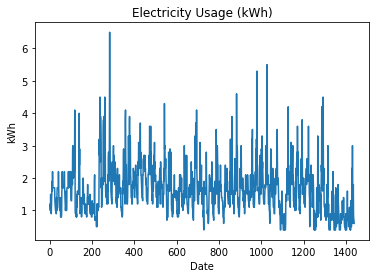

In [13]:
plt.title('Electricity Usage (kWh)')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.plot(master['Usage (kWh)'])
plt.show()

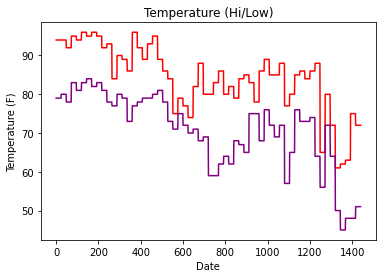

In [14]:
plt.title('Temperature (Hi/Low)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.plot(master['Hi'], color = 'red')
plt.plot(master['Low'], color = 'purple')
plt.show()